In [28]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()

In [3]:
X = iris.data[:,:3]
y = iris.data[:,3]
X.shape, y.shape

((150, 3), (150,))

In [10]:
# 신경망 모델 설계

model = keras.models.Sequential() 
model.add(keras.layers.Dense(100, activation='relu', input_shape = (3,)))  # 입력 바로 다음에있는 중간층 레이어
model.add(keras.layers.Dense(10, activation='relu'))    # 두 번째 중간층 레이어
model.add(keras.layers.Dense(1))    # 결과층 레이어

# 항상 비슷한 방식으로 사용하기 때문에 한 번 써 놓으면 복사해서 쓸 수 있다.

In [11]:
model.summary()

# Params : 화살표 개수

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               400       
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse', optimizer='adam') 
history = model.fit(X, y, epochs=50, batch_size=32)

# epochs : 반복 회수
# loss : 오차 혹은 에러. 예측한 값과 실제 값의 격차. 반복할수록 오차가 줄어든다.
# mse : mean squared error, 오차를 제곱한 값들의 평균
# loss 를 줄이는 방식중 하나의 adam.
# 신경망의 핵심, 설계도대로 실행한 후 오차를 계산하고, 오차를 줄이는 방향으로 조정한다.

Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 2.2340
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1818
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5764
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3005
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2154
Epoch 6/50
5/5 [==============================] - 0s 997us/step - loss: 0.1644
Epoch 7/50
5/5 [==============================] - 0s 998us/step - loss: 0.1296
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 9/50
5/5 [==============================] - 0s 997us/step - loss: 0.0796
Epoch 10/50
5/5 [==============================] - 0s 997us/step - loss: 0.0650
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 12/50
5/5 [==============================] - 0s 748us/step - loss: 0.0526
Epoch 13/50
5/5 [==============================] - 0s 1ms/step 

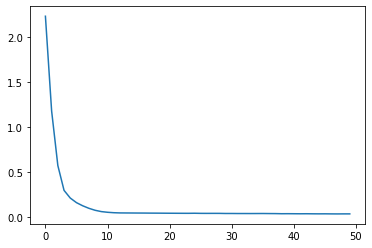

In [14]:
plt.plot(history.history['loss'])

5/5 [==============================] - 0s 755us/step


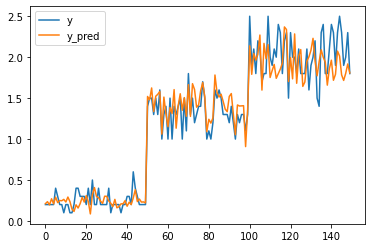

In [15]:
y_pred = model.predict(X)
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# 입력할 데이터 X_train: 28 * 28 크기의 각 도트가 최대값 255를 갖는 표형 데이터
# 결과 데이터 y_train : 최대값 9를 갖는 한자리수 결과 데이터

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

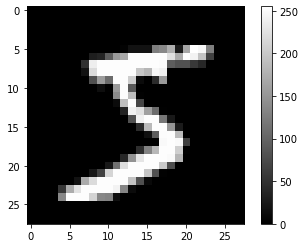

In [20]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()

In [26]:
### 데이터 전처리

X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255
X_train.shape, X_test.shape

# X_train과 X_test의 각 도트의 값의 범위가 1~255이기 때문에 255로 나누어줌으로 1~0 사이의 값으로 제한한다.

((60000, 784), (10000, 784))

In [29]:
### 원 핫 인코딩
y_train = np.eye(10)[y_train] # y = 1 이라면 [1, 0, 0, 0, 0,....] 으로 인코딩 해준다.
y_test = np.eye(10)[y_test]

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1000, activation='relu', input_shape = (784, )))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))



In [41]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['acc']) 

history = model.fit(X_train, y_train, epochs=20, batch_size = 32, validation_split=0.25)


Epoch 1/20
1407/1407 [==============================] - 11s 7ms/step - loss: 0.2145 - acc: 0.9347 - val_loss: 0.1197 - val_acc: 0.9637
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0944 - acc: 0.9712 - val_loss: 0.1115 - val_acc: 0.9673
Epoch 3/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0664 - acc: 0.9796 - val_loss: 0.1057 - val_acc: 0.9681
Epoch 4/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0519 - acc: 0.9834 - val_loss: 0.1057 - val_acc: 0.9719
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0926 - val_acc: 0.9751
Epoch 6/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.1353 - val_acc: 0.9681
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0277 - acc: 0.9911 - val_loss: 0.1248 - val_acc: 0.9694
Epoch 8/20
1407/1407 [==============================] -

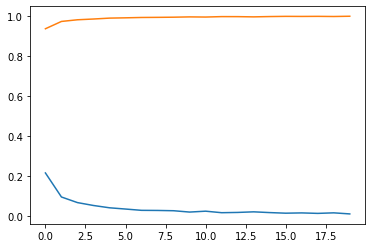

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])


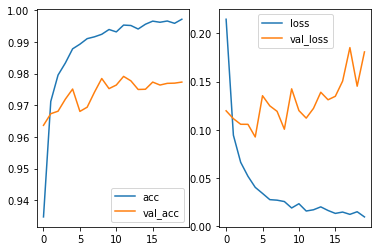

In [43]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

